In [1]:

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)


In [2]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import scipy.fftpack
import helper_functions as hf

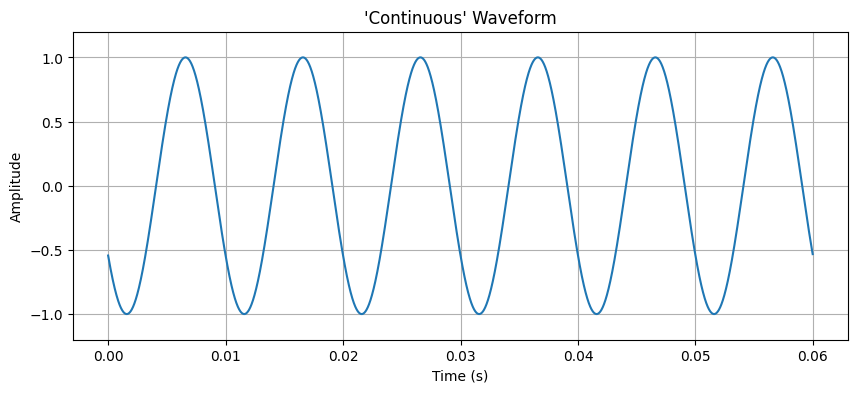

In [3]:
A = 1       # Amplitude
f = 100     # Desired frequency 
t = 0.06    # Time
p = 10      # Phase

ar = 48000  # A high sample rate to approximate a continuous signal. ar = analogue rate

x_cont = np.arange(0, t, 1/ar)                    # Discrete time i.e. sampled time period
y_cont = A * np.sin(2 * np.pi * f * x_cont + p)   # Formula for sine wave

ax = hf.plot_timeseries("'Continuous' Waveform",
                        [x_cont], [y_cont],
                        ['continuous'])

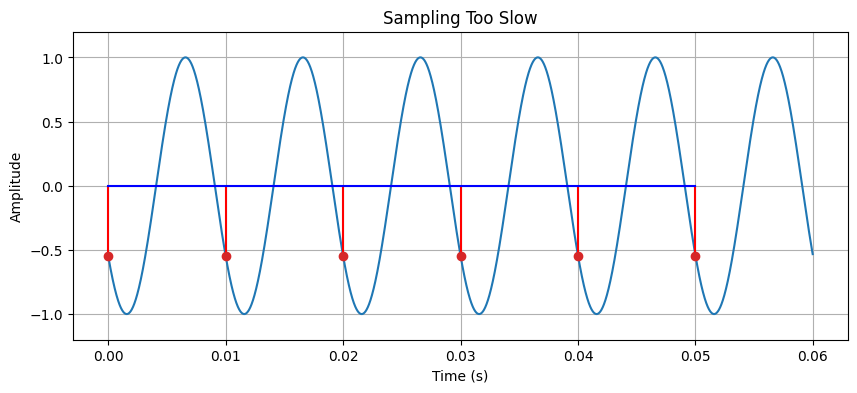

In [11]:
A = 1       # Amplitude
f = 100     # Desired frequency 
t = 0.06    # Time
p = 10      # Phase

fs = 100    # 100 Hz (1 sample per period)

x = np.arange(0, t, 1/fs)                # Discrete time i.e. sampled time period
y = A * np.sin(2 * np.pi * f * x + p)    # Formula for sine wave

hf.plot_timeseries("Sampling Too Slow",
                   [x_cont, x], [y_cont, y], 
                   ['continuous', 'discrete'])

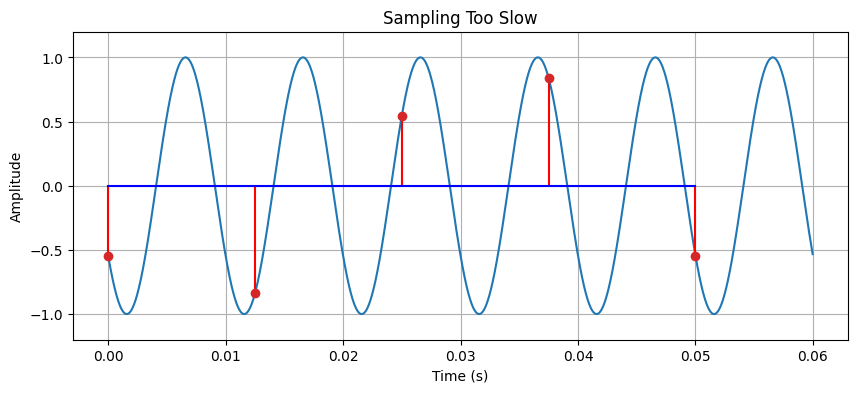

In [12]:
A = 1       # Amplitude
f = 100     # Desired frequency 
t = 0.06    # Time
p = 10      # Phase

fs = 80    # 80 Hz (1 sample every 0.8 of a period)

x = np.arange(0, t, 1/fs)                # Discrete time i.e. sampled time period
y = A * np.sin(2 * np.pi * f * x + p)    # Formula for sine wave

hf.plot_timeseries("Sampling Too Slow",
                   [x_cont, x], [y_cont, y],
                   ['continuous', 'discrete'])

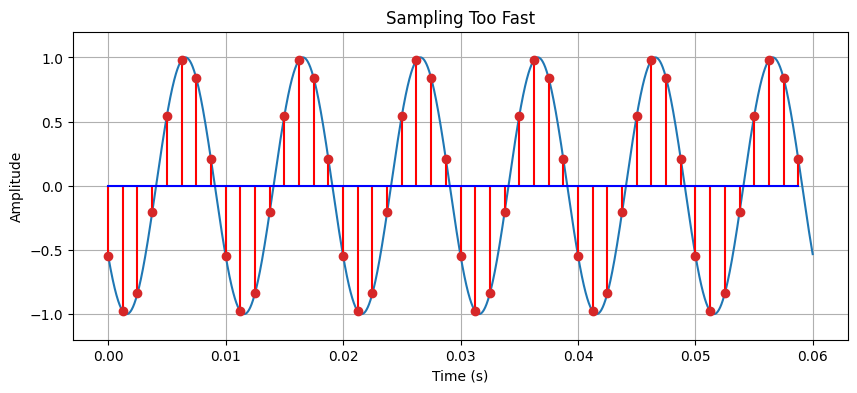

In [13]:
A = 1       # Amplitude
f = 100     # Desired frequency 
t = 0.06    # Time
p = 10      # Phase

fs = 800    # 800 Hz (8 samples per period)

x = np.arange(0, t, 1/fs)                # Discrete time i.e. sampled time period
y = A * np.sin(2 * np.pi * f * x + p)    # Formula for sine wave

hf.plot_timeseries("Sampling Too Fast", 
                   [x_cont, x], [y_cont, y], 
                   ['continuous', 'discrete'])

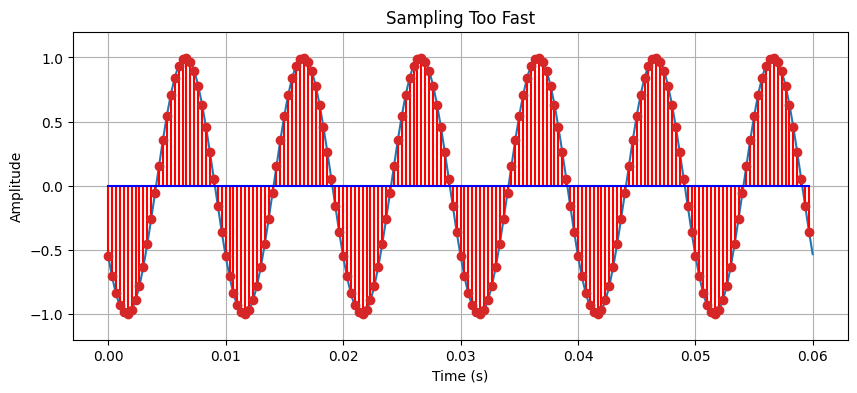

In [14]:
A = 1       # Amplitude
f = 100     # Desired frequency 
t = 0.06    # Time
p = 10      # Phase

fs = 3000    # 3000 Hz (30 samples per period)

x = np.arange(0, t, 1/fs)                # Discrete time i.e. sampled time period
y = A * np.sin(2 * np.pi * f * x + p)    # Formula for sine wave

hf.plot_timeseries("Sampling Too Fast", 
                   [x_cont, x], [y_cont, y], 
                   ['continuous', 'discrete'])

**Aliasing**

When a (baseband) signal is sampled at a frequency below the Nyquist frequency, then we “lose” the signal's information and aliasing is said to have occurred.

Aliasing can be illustrated by sampling a sine wave below the Nyquist frequency. The sine wave will appear to have a lower frequency.

Consider again, sampling the 100 Hz size wave at 80 Hz.


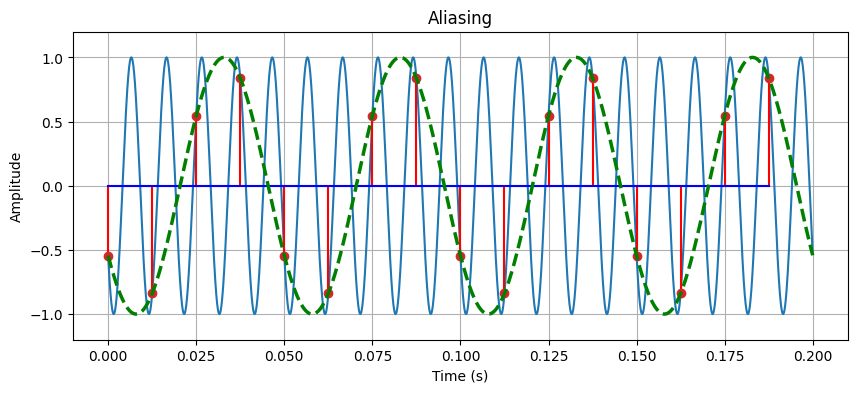

Perceived frequency:  20.0 Hz


In [24]:
A = 1       # Amplitude
f = 100     # Desired frequency 
t = 0.2     # Time
p = 10      # Phase

fs = 80     # Sampling frequency 
 
# 'Continuous' waveform
x_cont = np.arange(0, t, 1/ar)                   
y_cont = A * np.sin(2 * np.pi * f * x_cont + p)   

# Sampled waveform
x = np.arange(0, t, 1/fs)               
y = A * np.sin(2 * np.pi * f * x + p)   

# Perceived aliased waveform
f_alias = f-fs*np.round(f/fs)
x_alias = np.arange(0, t, 1/ar)
y_alias = A * np.sin(2 * np.pi * f_alias * x_alias + p)

hf.plot_timeseries("Aliasing",
                   [x_cont, x, x_alias], [y_cont, y, y_alias],
                   ['continuous', 'discrete', 'dash'])
print("Perceived frequency: ", f_alias, "Hz")

In [25]:
t = 0.5
fs = 1000

x_cont = np.arange(0, t, 1/ar) # 'Continuous'
x = np.arange(0, t, 1/fs)      # Sampled

A1 = 100
A2 = 1
A3 = 0.01

# Case 1
y1_cont = A1 * np.sin(2 * np.pi * (fs*0.1) * x_cont) \
        + A2 * np.sin(2 * np.pi * (fs*0.25) * x_cont) \
        + A3 * np.sin(2 * np.pi * (fs*0.4) * x_cont)             
y1 = A1 * np.sin(2 * np.pi * (fs*0.1) * x) \
   + A2 * np.sin(2 * np.pi * (fs*0.25) * x) \
   + A3 * np.sin(2 * np.pi * (fs*0.4) * x)

# Case 2
y2_cont = A1 * np.sin(2 * np.pi * (fs*0.9) * x_cont) \
        + A2 * np.sin(2 * np.pi * (fs*0.75) * x_cont) \
        + A3 * np.sin(2 * np.pi * (fs*0.6) * x_cont)
y2 = A1 * np.sin(2 * np.pi * (fs*0.9) * x) \
   + A2 * np.sin(2 * np.pi * (fs*0.75) * x) \
   + A3 * np.sin(2 * np.pi * (fs*0.6) * x)

# Case 3
y3_cont = A1 * np.sin(2 * np.pi * (fs*1.1) * x_cont) \
        + A2 * np.sin(2 * np.pi * (fs*1.25) * x_cont) \
        + A3 * np.sin(2 * np.pi * (fs*1.4) * x_cont)
y3 = A1 * np.sin(2 * np.pi * (fs*1.1) * x) \
   + A2 * np.sin(2 * np.pi * (fs*1.25) * x) \
   + A3 * np.sin(2 * np.pi * (fs*1.4) * x)

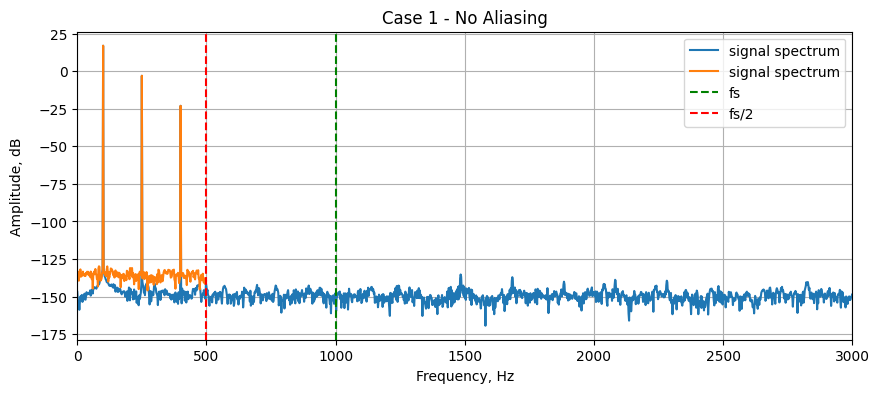

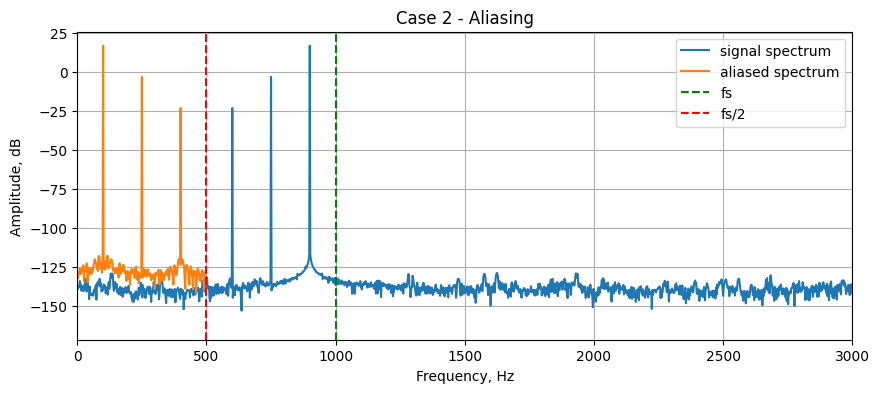

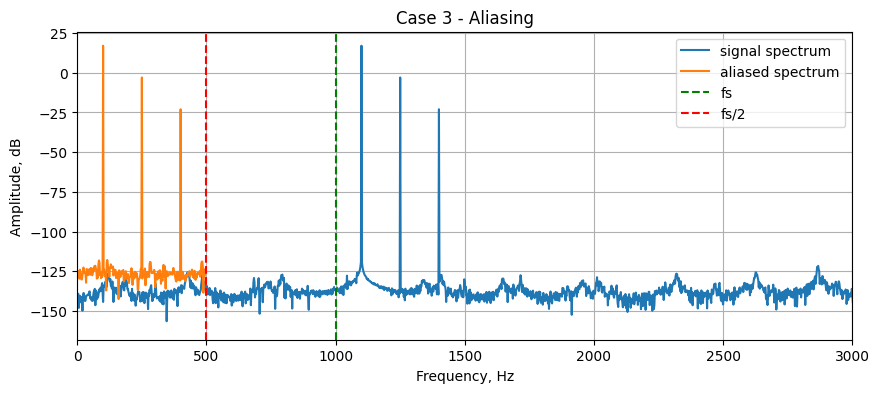

In [26]:
freqs_cont = np.fft.fftshift(np.fft.fftfreq(len(x_cont),1/ar)) #frequency domain axis for graphs
freqs = np.fft.fftshift(np.fft.fftfreq(len(x),1/fs)) #frequency domain axis for graphs

title = "Case 1 - No Aliasing"
fft_cont = hf.find_fft(y1_cont,len(x_cont))
fft_signal = hf.find_fft(y1,len(x))
hf.plot_fft([freqs_cont, freqs], [fft_cont, fft_signal], 
         fs, title, label=['signal spectrum', 'signal spectrum'])

title = "Case 2 - Aliasing"
fft_cont = hf.find_fft(y2_cont,len(x_cont))
fft_signal = hf.find_fft(y2,len(x))
hf.plot_fft([freqs_cont, freqs], [fft_cont, fft_signal], 
         fs, title, label=['signal spectrum', 'aliased spectrum'])

title = "Case 3 - Aliasing"
fft_cont = hf.find_fft(y3_cont,len(x_cont))
fft_signal = hf.find_fft(y3,len(x))
hf.plot_fft([freqs_cont, freqs], [fft_cont, fft_signal],
         fs, title, label=['signal spectrum', 'aliased spectrum'])